In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("/content/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
df['director'].fillna('unkhown',inplace=True)
df['cast'].fillna('unkhown',inplace=True)
df['country'].fillna('unkhown',inplace=True)
df['duration'].fillna('unkhown',inplace=True)
df['date_added'].fillna('0/0/0',inplace=True)

In [12]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

In [13]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unkhown,"Oprah Winfrey, Ava DuVernay",unkhown,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,unkhown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,unkhown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [14]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
df.loc[7312, 'rating'] = 'TV-Y'
df.loc[5989, 'rating'] = 'PG'
df.loc[7537, 'rating'] = 'UR'
df.loc[6827, 'rating'] = 'TV-PG'

In [16]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,98
release_year,0
rating,0
duration,0


In [17]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


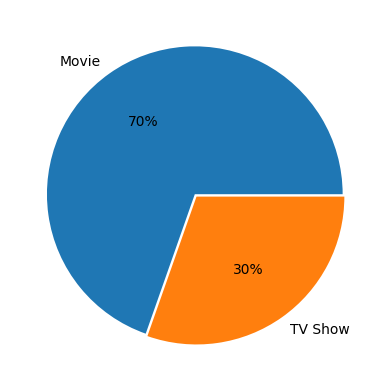

In [18]:
plt.pie(df['type'].value_counts().values, labels=df['type'].value_counts().index, autopct='%0.0f%%', explode=[0,0.02])
plt.show()

In [19]:
df['director'].value_counts()[0:12]

,count
director,
unkhown,2634
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12


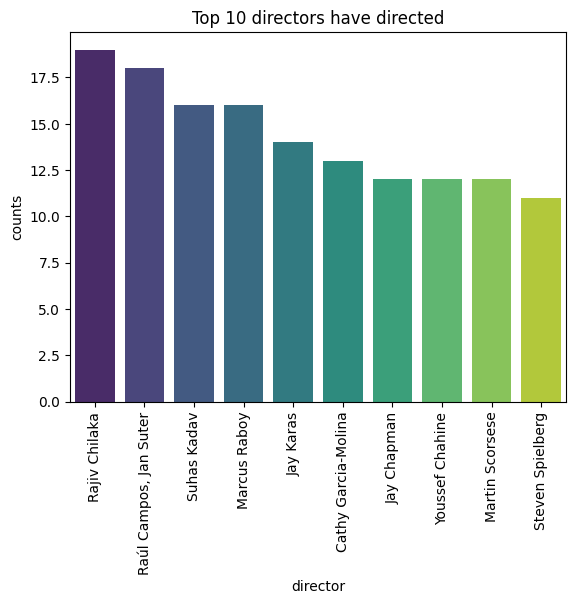

In [20]:
sns.barplot(x=df['director'].value_counts()[1:11].index,
            y=df['director'].value_counts()[1:11].values,
            palette="viridis")
plt.xticks(rotation=90)
plt.title('Top 10 directors have directed')
plt.ylabel('counts')
plt.show()

In [21]:
df['cast'].value_counts()[1:11]

,count
cast,
David Attenborough,19
"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil",14
Samuel West,10
Jeff Dunham,7
Craig Sechler,6
"David Spade, London Hughes, Fortune Feimster",6
Kevin Hart,6
"Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath",6
Iliza Shlesinger,5


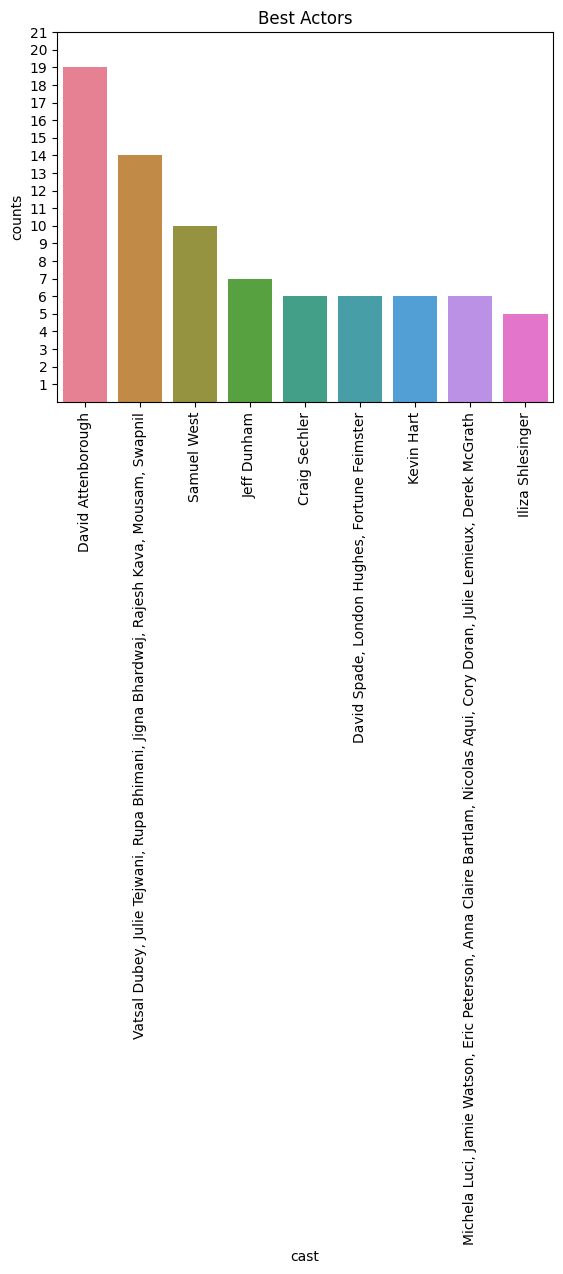

In [22]:
sns.barplot(x=df['cast'].value_counts()[1:10].index,
            y=df['cast'].value_counts()[1:10].values,
            palette='husl')
plt.xticks(rotation=90)
plt.title('Best Actors')
plt.ylabel('counts')
plt.yticks(np.arange(1,22))
plt.show()

In [23]:
df['country'].value_counts()[0:11]

,count
country,
United States,2818
India,972
unkhown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


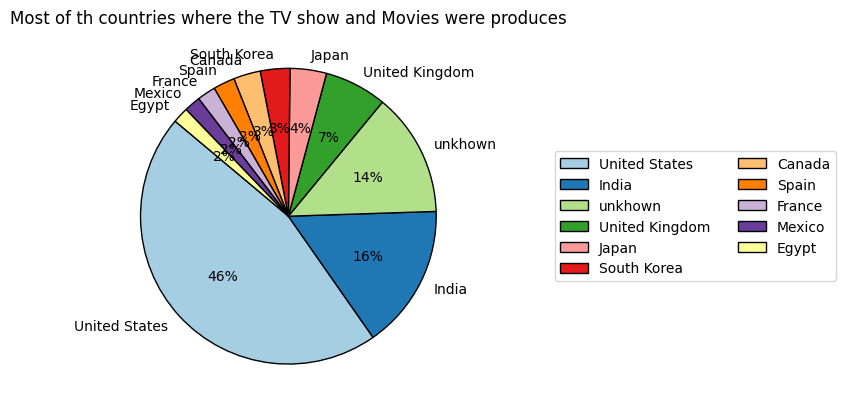

In [24]:
plt.pie(df['country'].value_counts()[0:11].values,
        labels=df['country'].value_counts()[0:11].index,
        autopct="%0.0f%%",
        colors=plt.cm.Paired.colors,
        startangle=140,
        labeldistance=1.1,
        wedgeprops={'edgecolor': 'black'})
plt.title('Most of th countries where the TV show and Movies were produces')
plt.legend(loc='center right', bbox_to_anchor=(2,0.5), ncol=2)
plt.show()

In [25]:
df['date_added']

,date_added
0,2021-09-25
1,2021-09-24
2,2021-09-24
3,2021-09-24
4,2021-09-24
...,...
8802,2019-11-20
8803,2019-07-01
8804,2019-11-01
8805,2020-01-11


In [28]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['year_added'], inplace=True)
df['year_added'] = df['year_added'].astype(int)



df['month_added']=df['date_added'].dt.month
df['month_added'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['month_added'], inplace=True)
df['month_added'] = df['month_added'].astype(int)

In [27]:
df['year_added'].value_counts()

,count
year_added,
2019.0,1999
2020.0,1878
2018.0,1625
2021.0,1498
2017.0,1164
2016.0,418
2015.0,73
2014.0,23
2011.0,13


In [29]:
pd.crosstab(df['year_added'], df['month_added'])

month_added,1,2,3,4,5,6,7,8,9,10,11,12
year_added,,,,,,,,,,,,
2008,1,1,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,1,0,0,0,0,0,1,0
2010,0,0,0,0,0,0,0,0,0,0,1,0
2011,0,0,0,0,1,0,0,0,1,11,0,0
2012,0,1,0,0,0,0,0,0,0,0,1,1
2013,0,0,1,0,0,0,0,1,2,2,2,2
2014,2,2,0,2,0,1,1,1,1,4,4,5
2015,1,3,4,5,5,5,7,2,6,14,3,18
2016,41,15,16,21,11,18,28,34,46,51,42,95


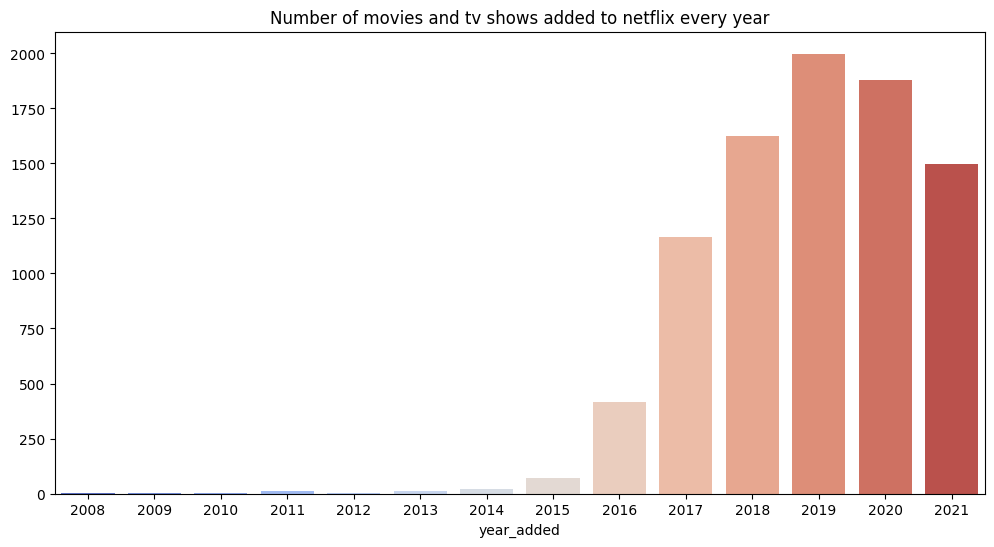

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['year_added'].value_counts().index,
             y=df['year_added'].value_counts().values,
            palette='coolwarm')
plt.title('Number of movies and tv shows added to netflix every year')
plt.show()

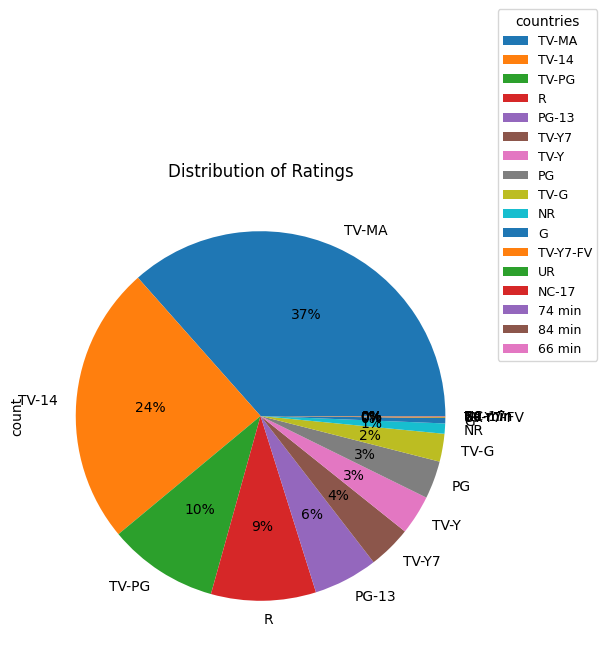

In [39]:
plt.figure(figsize=(12,6))

df['rating'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Distribution of Ratings')
plt.legend(
    title = "countries",
    loc = "center left",
    bbox_to_anchor =(1,1),
    fontsize = 9
)
plt.show()

In [40]:
df['release_year'].value_counts()

,count
release_year,
2018,1140
2019,1030
2017,1016
2020,953
2016,878
...,...
1959,1
1925,1
1961,1


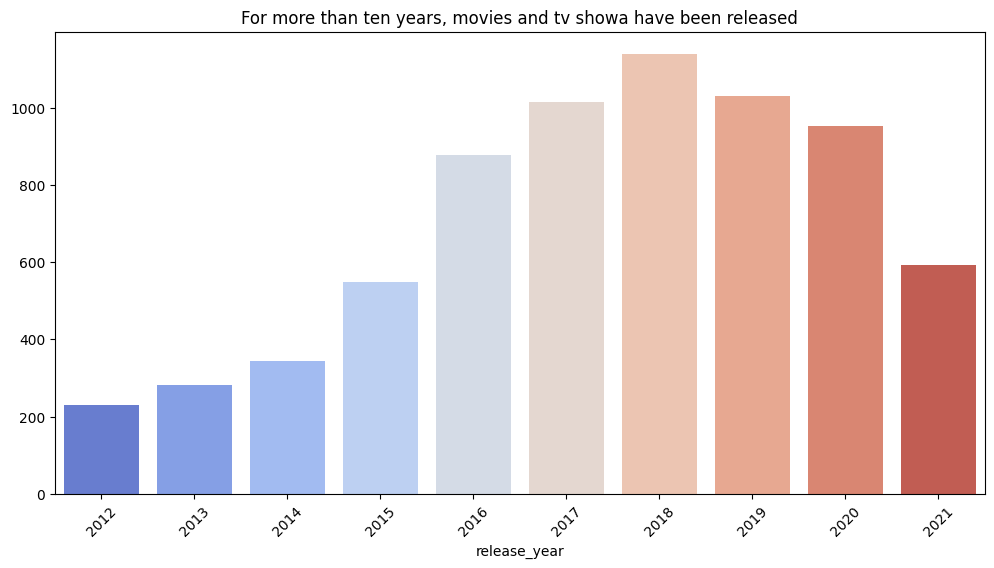

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['release_year'].value_counts()[0:10].index,
            y=df['release_year'].value_counts()[0:10].values,
            palette='coolwarm'
            )
plt.title('For more than ten years, movies and tv showa have been released')
plt.xticks(rotation=45)
plt.show()